In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

SurveyData = pd.read_csv("survey_results_public.csv")

In [2]:
## This survey is anonymized that's why there is no email, name etc.
SurveyData.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [3]:
SurveyData.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

## It appears that shortcodes for questions have been used as column names. We can refer to the schema file to see the full text of each question. The schema file contains only two columns: Column and QuestionText. 

In [4]:
schema_FileName = 'survey_results_schema.csv'
schema_Raw = pd.read_csv(schema_FileName, index_col='Column').QuestionText

In [5]:
schema_Raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [6]:
schema_Raw['WorkWeekHrs']

'On average, how many hours per week do you work? Please enter a whole number in the box.'

# <span style="color: red;">Data Manipulation</span>

## While there is a lot of information in the survey replies, we will limit our study to the following topics.
* Demographics of the survey respondents
* Distribution of programming skills, experience and preferences
* Employment-Related information

In [7]:
Columns = [
    # Demographics
    'Country','Age','Gender','EdLevel','UndergradMajor',"Ethnicity",
    # Programming experience
    'Hobbyist','DatabaseWorkedWith','Age1stCode','YearsCode','YearsCodePro','LanguageWorkedWith','LanguageDesireNextYear','NEWLearn','NEWStuck',
    # Employment
    'Employment','DevType','WorkWeekHrs','JobSat','JobFactors','NEWOvertime','NEWEdImpt']

In [8]:
len(Columns)

22

In [9]:
## Now we will extract a copy of data from these columns into a new data frame. So we won t affect the original data frame.
surveyDF = SurveyData[Columns].copy()


In [10]:
Schema = schema_Raw[Columns]

In [11]:
surveyDF.shape

(64461, 22)

In [12]:
surveyDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Ethnicity               45948 non-null  object 
 6   Hobbyist                64416 non-null  object 
 7   DatabaseWorkedWith      49537 non-null  object 
 8   Age1stCode              57900 non-null  object 
 9   YearsCode               57684 non-null  object 
 10  YearsCodePro            46349 non-null  object 
 11  LanguageWorkedWith      57378 non-null  object 
 12  LanguageDesireNextYear  54113 non-null  object 
 13  NEWLearn                56156 non-null  object 
 14  NEWStuck                54983 non-null

Most columns have the data type object, either because they include diverse types of values or because they contain empty values (NaN). Because the Non-Null count for each column is less than the total number of rows, it looks that every column has some empty values. We'll have to deal with empty values and update the data type for each column individually.

Despite the fact that a few additional columns have predominantly numeric values, only two of them (Age and WorkWeekHrs) were identified as numeric columns. To make it easier for our study, let's convert some additional columns to numeric data types while ignoring any non-numeric values. Non-numeric values are transformed to NaN.

In [13]:
surveyDF['Age1stCode'] = pd.to_numeric(surveyDF.Age1stCode, errors='coerce')
surveyDF['YearsCode'] = pd.to_numeric(surveyDF.YearsCode, errors='coerce')
surveyDF['YearsCodePro'] = pd.to_numeric(surveyDF.YearsCodePro, errors='coerce')

In [14]:
surveyDF.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000



<span style="color: green;">There is a problem with age column how is that possible a baby can do this survey or is there any human being in this world is 279 years old. So we will fix this. To fix this, we will limit the age range to between 12 and 95 to make it more accurate.
</span>

In [15]:
surveyDF.drop(surveyDF[surveyDF.Age < 12].index, inplace=True)
surveyDF.drop(surveyDF[surveyDF.Age > 95].index, inplace=True)

<span style="color: green;">I can see that also there is a problem for WorkWeekHrs i don't think Superman exists and can work more than 120 hours in a week.Let's say there is one person sleeps 6 hours every day. In total he will sleep 42 hours in a week.Also, he needs to use washroom and eat so i give it 7 hours for these in a week. So to be realistic one person can work maximum 119 hours.</span>

In [16]:
surveyDF.drop(surveyDF[surveyDF.WorkWeekHrs > 119].index, inplace=True)


In [17]:
surveyDF['Gender'].value_counts()


Gender
Man                                                            45866
Woman                                                           3833
Non-binary, genderqueer, or gender non-conforming                382
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           91
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       23
Name: count, dtype: int64

<span style="color: green;">I will drop some values to simplify analysis</span>

In [18]:
surveyDF.where(~(surveyDF.Gender.str.contains(';', na=False)), np.nan, inplace=True)


<span style="color: green;">This code operates on a DataFrame named surveyDF. It uses the where method to replace values in the 'Gender' column. Specifically, it replaces values in the 'Gender' column with NaN or missing values for rows where the 'Gender' column does not contain a semicolon (';'). The ~ operator in front of the condition negates it, so it identifies rows where the 'Gender' column does not contain a semicolon. The overall purpose of this code is to handle or clean data related to gender in the DataFrame, setting it to missing values for cases where multiple genders are listed separated by a semicolon.</span>

In [19]:
surveyDF.sample(8)


,Country,Age,Gender,EdLevel,UndergradMajor,Ethnicity,Hobbyist,DatabaseWorkedWith,Age1stCode,YearsCode,...,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
106,United Kingdom,NaN,NaN,NaN,NaN,NaN,Yes,MariaDB;Microsoft SQL Server;MySQL;SQLite,30.0,35.0,...,C#;SQL,Once every few years,NaN,Retired,NaN,NaN,NaN,NaN,NaN,Fairly important
23145,Germany,28.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",White or of European descent,Yes,NaN,16.0,5.0,...,Go;Java;Kotlin;Python;SQL;Swift,Every few months,Call a coworker or friend;Visit Stack Overflow,Employed full-time,"Developer, back-end;Developer, desktop or ente...",40.0,Slightly dissatisfied,"Flex time or a flexible schedule;Languages, fr...",Sometimes: 1-2 days per month but less than we...,Somewhat important
43308,Netherlands,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,Student,NaN,NaN,NaN,NaN,NaN,NaN
60862,Australia,37.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Black or of African descent,No,Firebase;MariaDB;MySQL;SQLite,15.0,22.0,...,Dart,Once a year,Visit Stack Overflow;Watch help / tutorial vid...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",38.0,Very satisfied,Diversity of the company or organization;Offic...,Never,Fairly important
58199,Poland,26.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",NaN,Yes,Microsoft SQL Server;SQLite,18.0,5.0,...,C#;Java;JavaScript;Python;SQL,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",40.0,Neither satisfied nor dissatisfied,"Industry that I’d be working in;Languages, fra...",Occasionally: 1-2 days per quarter but less th...,Fairly important
32239,Netherlands,44.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A health science (such as nursing, pharmacy, r...",White or of European descent,No,Microsoft SQL Server;MySQL,25.0,19.0,...,NaN,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end",40.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Fairly important
28236,Germany,36.0,Man,"Secondary school (e.g. American high school, G...",NaN,Hispanic or Latino/a/x,Yes,NaN,28.0,5.0,...,HTML/CSS;JavaScript;TypeScript,Once a decade,Do other work and come back later,"Not employed, but looking for work","Developer, front-end",NaN,NaN,"Languages, frameworks, and other technologies ...",NaN,Not at all important/not necessary
59838,Hungary,21.0,Man,"Secondary school (e.g. American high school, G...",NaN,White or of European descent,Yes,MongoDB;MySQL,14.0,6.0,...,HTML/CSS;Java;JavaScript;SQL,Once a year,Play games;Visit Stack Overflow;Watch help / t...,Student,NaN,NaN,NaN,Industry that I’d be working in;Flex time or a...,NaN,NaN


# <span style="color: red;">Exploratory Data Analysis and Visualization</span>

In [20]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('Solarize_Light2')
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (10, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [21]:
Schema.Country


'Where do you live?'

In [22]:
surveyDF.Country.nunique()


183

In [23]:
TopCountries = surveyDF.Country.value_counts().head(20)
TopCountries

Country
United States         12365
India                  8354
United Kingdom         3879
Germany                3864
Canada                 2174
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1114
Russian Federation     1084
Sweden                  878
Pakistan                801
Turkey                  769
Israel                  648
Switzerland             628
Romania                 596
Bangladesh              595
Name: count, dtype: int64

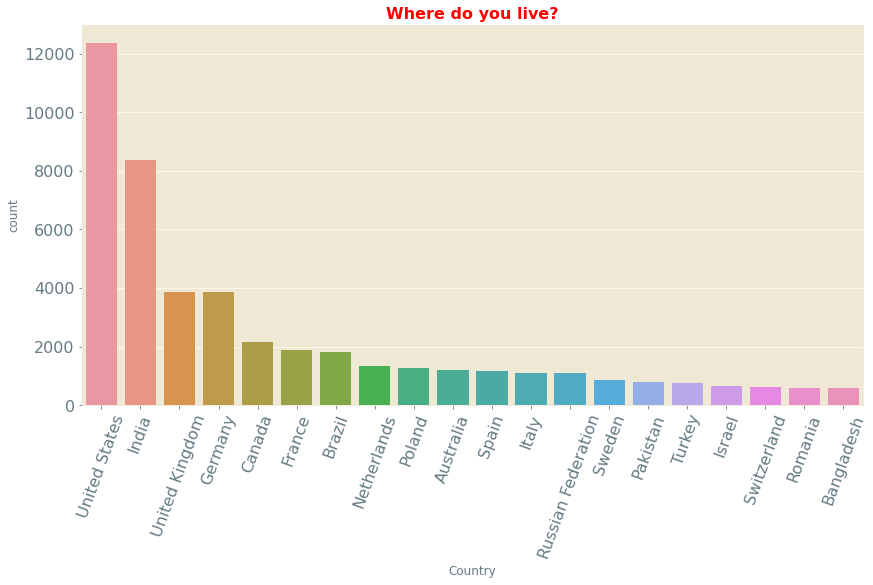

In [24]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=70)
plt.title(Schema.Country,color="red", fontweight="bold")
sns.barplot(x=TopCountries.index, y=TopCountries);

<span style="color: green;">A large proportion of respondents come from the United States and India, most likely because the survey is in English and these nations have the largest English-speaking populations. Already, we can see that the survey may not be representative of the worldwide programming community, particularly in non-English speaking countries. Non-English speaking programmers are almost probably underrepresented.</span>

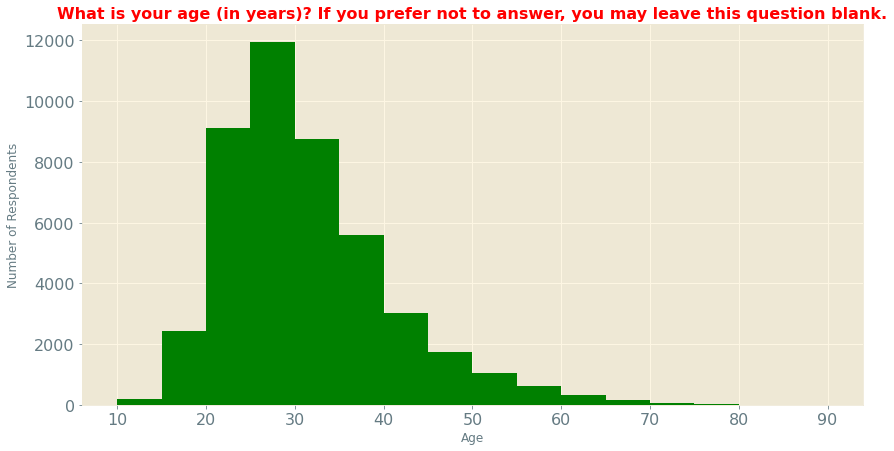

In [25]:
plt.figure(figsize=(14, 7))
plt.title(Schema.Age,color="red", fontweight="bold")
plt.xlabel('Age')
plt.ylabel('Number of Respondents')

plt.hist(surveyDF.Age, bins=np.arange(10,95,5), color='Green');

In [26]:
# We will Define the age group bins and labels
age_bins = [0, 10, 18, 30, 45, 60, float('inf')]
age_labels = ['Less than 10 years', '10-18 years', '18-30 years', '30-45 years', '45-60 years', 'Older than 60 years']

# We will use the `pd.cut` function to categorize ages into age groups
surveyDF['AgeGroup'] = pd.cut(surveyDF['Age'], bins=age_bins, labels=age_labels)

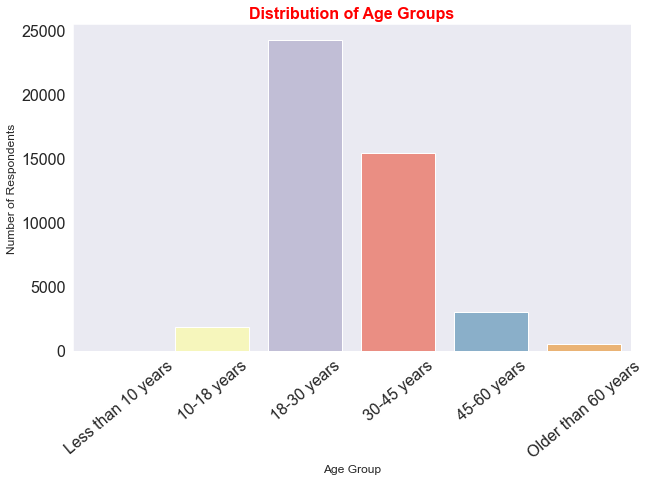

In [27]:
# We will Create a bar plot to visualize the age groups
plt.figure(figsize=(10, 6))
sns.set_style("dark")  # Use a white grid background for the plot

# Count the number of respondents in each age group
age_group_counts = surveyDF['AgeGroup'].value_counts().reindex(age_labels)

# Plot the bar chart
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette="Set3")
plt.title("Distribution of Age Groups", color="red", fontweight="bold")
plt.xlabel("Age Group")
plt.ylabel("Number of Respondents")

plt.xticks(rotation=40)  

plt.show()

<span style="color: green;">A high proportion of responses appear to be between the ages of 20 and 45. It's representative of the programming community as an entire group. In the last 20 years, many young individuals have chosen computer technology as an area of study or a career.</span>

In [28]:
Schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [29]:
GenderCounts = surveyDF.Gender.value_counts()
GenderCounts 

Gender
Man                                                  45866
Woman                                                 3833
Non-binary, genderqueer, or gender non-conforming      382
Name: count, dtype: int64

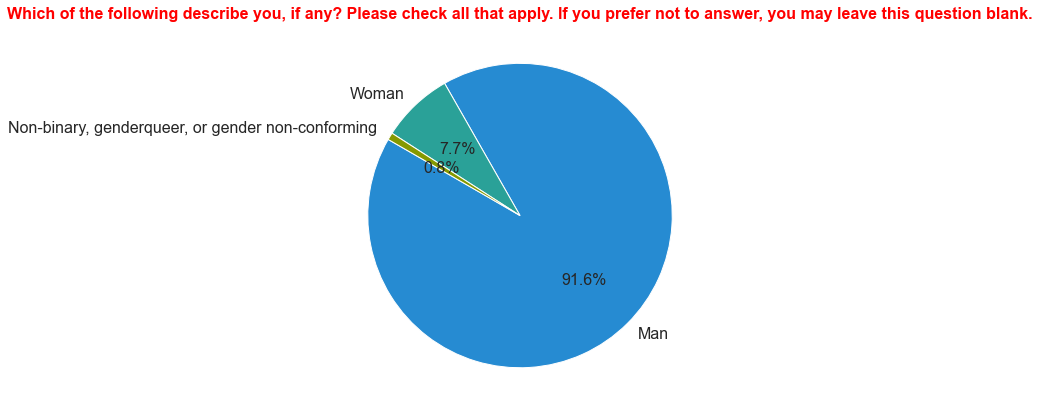

In [30]:
plt.figure(figsize=(14,7))
plt.title(Schema.Gender,color="red", fontweight="bold")
plt.pie(GenderCounts, labels=GenderCounts.index, autopct='%1.1f%%', startangle=150);

<span style="color: green;">Only about eight percent of those who responded to the survey identified as female or non-binary. This figure is lower than the expected 12% female and non-binary gender representation in the programming community.</span>

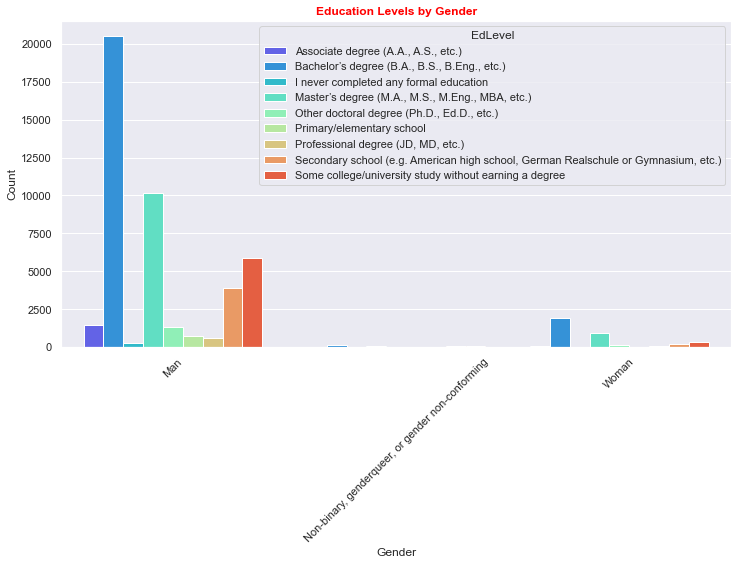

In [31]:

# Data preparation and filtering
df_cleaned = surveyDF.dropna(subset=['Gender', 'EdLevel'])

# Grouping and aggregation
gender_education_counts = df_cleaned.groupby(['Gender', 'EdLevel']).size().reset_index(name='Count')

# Define a custom color palette resembling a rainbow
custom_palette = sns.color_palette("rainbow", n_colors=len(gender_education_counts['EdLevel'].unique()))


plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")  
sns.barplot(data=gender_education_counts, x='Gender', y='Count', hue='EdLevel', palette=custom_palette)
plt.title('Education Levels by Gender',color="red", fontweight="bold")
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

<span style="color: green;">We can see that majority of people responded this survey is men and they have mostly bachelor's and master's degree. , </span>

## Formal computer science education is sometimes seen as an essential requirement for becoming a programmer. However, there are numerous free online tools and courses for learning programming. To obtain some insight into this, let's compare the education levels of the respondents.

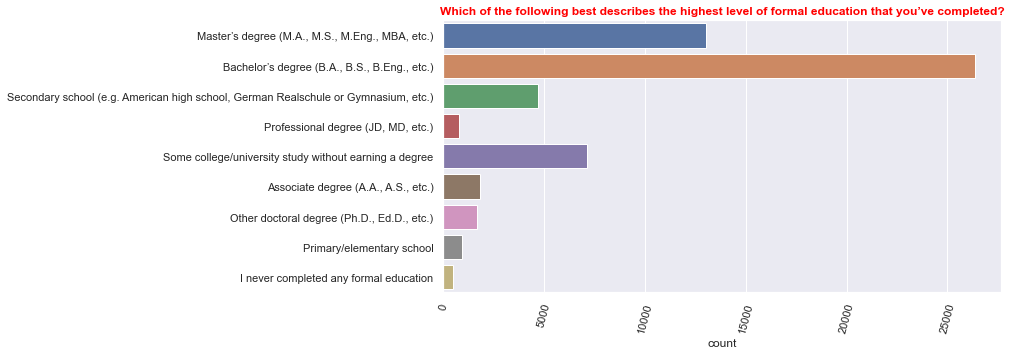

In [32]:
sns.countplot(y=surveyDF.EdLevel)
plt.xticks(rotation=75);
plt.title(Schema['EdLevel'],color="red", fontweight="bold")
plt.ylabel(None);

<span style="color: green;">It shows that just over half of the respondents have a bachelor's or master's degree, indicating that the majority of programmers have some college education. However, it is unclear from this graph which degree they hold. , </span>

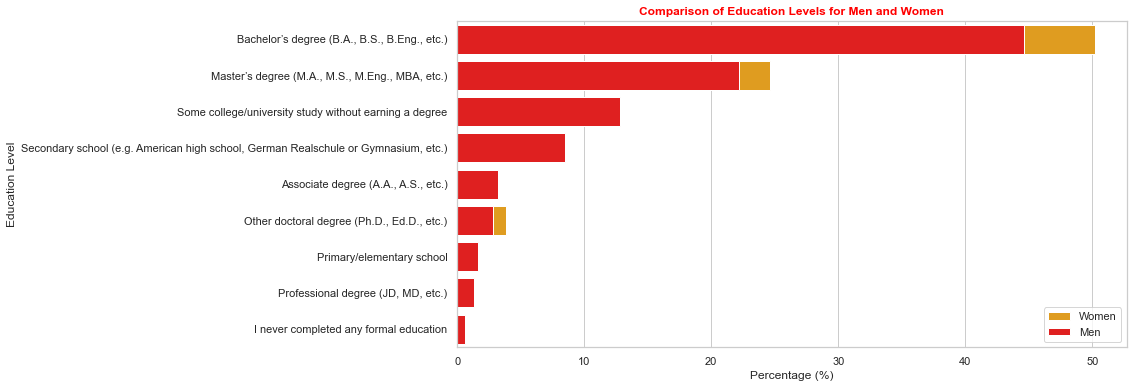

In [33]:
# Calculate the percentage distribution of education levels within each gender group
edu_level_counts = surveyDF['EdLevel'].value_counts()
edu_level_percentages = (edu_level_counts / len(surveyDF)) * 100

# Create a DataFrame with education level percentages for men and women
men_edu = surveyDF[surveyDF['Gender'] == 'Man']['EdLevel']
women_edu = surveyDF[surveyDF['Gender'] == 'Woman']['EdLevel']

men_edu_counts = men_edu.value_counts()
women_edu_counts = women_edu.value_counts()

men_edu_percentages = (men_edu_counts / len(men_edu)) * 100
women_edu_percentages = (women_edu_counts / len(women_edu)) * 100

edu_comparison = pd.DataFrame({
    'Education Level': edu_level_percentages.index,
    'Men (%)': men_edu_percentages[edu_level_percentages.index].values,
    'Women (%)': women_edu_percentages[edu_level_percentages.index].values
})


plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.barplot(data=edu_comparison, x='Women (%)', y='Education Level', color='orange', label='Women')
sns.barplot(data=edu_comparison, x='Men (%)', y='Education Level', color='red', label='Men')
plt.title('Comparison of Education Levels for Men and Women',color="red", fontweight="bold")
plt.xlabel('Percentage (%)')
plt.ylabel('Education Level')

plt.legend()
plt.show()

<span style="color: green;">We see that 50% of the women surveyed have a bachelor's degree and 25% have a master's degree. When we look at men, this rate is slightly lower. Recently we can see that women are actively participating in education. , </span>

In [34]:
Schema.UndergradMajor

'What was your primary field of study?'

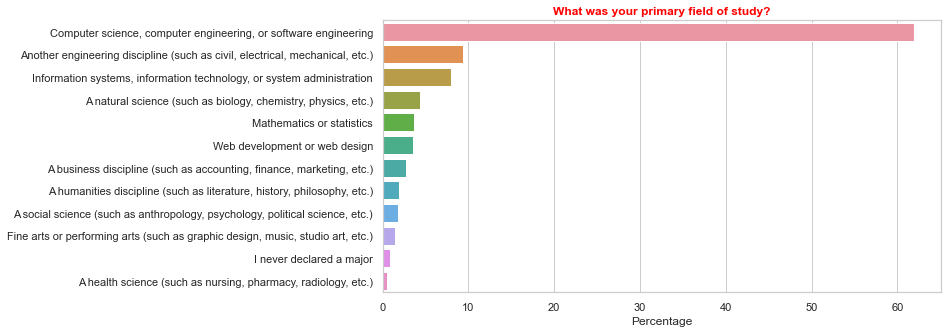

In [35]:
Undergrad = surveyDF.UndergradMajor.value_counts() * 100 / surveyDF.UndergradMajor.count()

sns.barplot(x=Undergrad, y=Undergrad.index)

plt.title(Schema.UndergradMajor,color="red", fontweight="bold")
plt.ylabel(None);
plt.xlabel('Percentage');

<span style="color: green;">It turns out that 40% of college-educated programmers studied something other than computer science, which is very interesting. It seems like it means that, while a college degree is beneficial in general, a major in computer science is not required to become a great programmer., </span>

In [36]:
Schema.Employment

'Which of the following best describes your current employment status?'

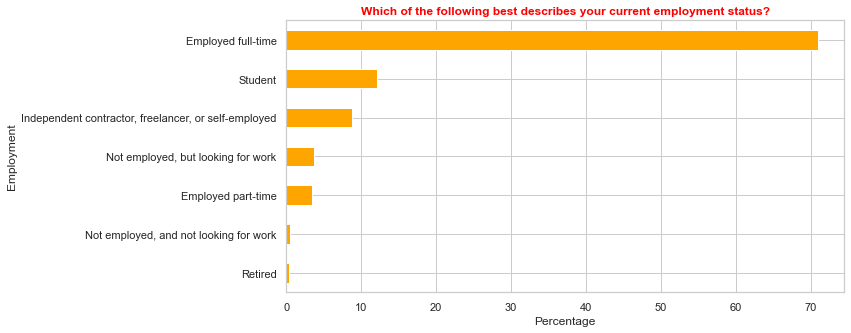

In [37]:
(surveyDF.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='orange')
plt.title(Schema.Employment,color="red", fontweight="bold")
plt.xlabel('Percentage');

<span style="color: green;">It shows that about 10% of respondents work part-time or as freelancers.</span>

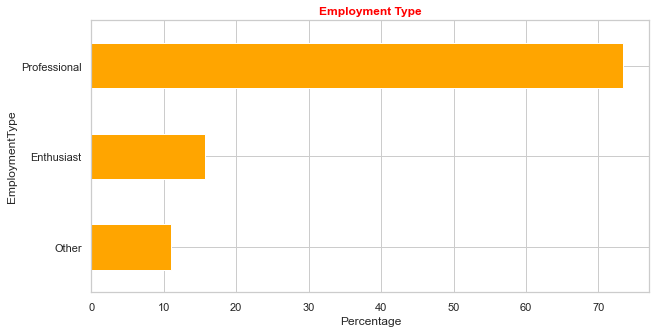

In [38]:
# We will define the conditions to categorize employment
conditions = [
    (surveyDF['Employment'].isin(['Student', 'Not employed, but looking for work'])),
    (surveyDF['Employment'].isin(['Employed full-time', 'Employed part-time', 'Freelance', 'Self-employed'])),]

# Defining the corresponding labels
employment_types = ['Enthusiast', 'Professional']

#  the new "EmploymentType" column based on the conditions
surveyDF['EmploymentType'] = pd.Series(np.select(conditions, employment_types, 'Other'))

# Plot the employment distribution
(surveyDF['EmploymentType'].value_counts(normalize=True, ascending=True) * 100).plot(kind='barh', color='orange')
plt.title('Employment Type', color="red", fontweight="bold")
plt.xlabel('Percentage')
plt.show()

# Compare Enthusiast and Professional for other graphs
enthusiast_df = surveyDF[surveyDF['EmploymentType'] == 'Enthusiast']
professional_df = surveyDF[surveyDF['EmploymentType'] == 'Professional']


<span style="color: green;">We can clearly see the comparison between the "Enthusiast" and "Professional" categories. "Enthusiast" includes students and those not employed but looking for work, while "Professional" encompasses those employed full-time, part-time, or freelancing.</span>

In [39]:
Schema.DevType

'Which of the following describe you? Please select all that apply.'

In [40]:
surveyDF.DevType.value_counts()


DevType
Developer, full-stack                                                                                                                     4394
Developer, back-end                                                                                                                       3052
Developer, back-end;Developer, front-end;Developer, full-stack                                                                            2214
Developer, back-end;Developer, full-stack                                                                                                 1464
Developer, front-end                                                                                                                      1390
                                                                                                                                          ... 
Developer, back-end;Developer, desktop or enterprise applications;Developer, embedded applications or devices;Educator;Product manager

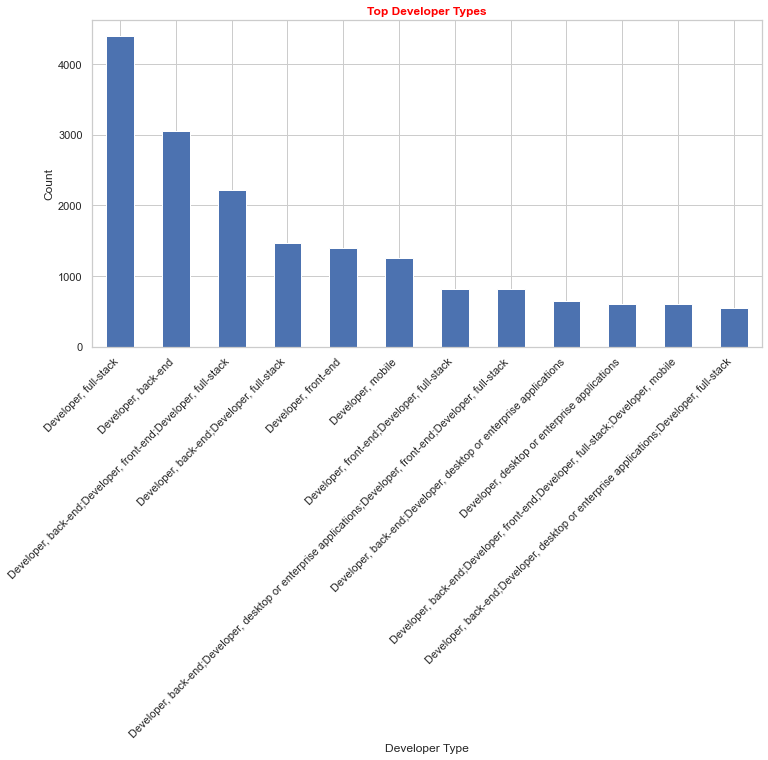

In [41]:
devtype_counts = surveyDF['DevType'].value_counts()

# 
top_n = 12  
devtype_counts = devtype_counts.head(top_n)


plt.figure(figsize=(12, 6))
devtype_counts.plot(kind='bar')
plt.title('Top Developer Types',color="red", fontweight="bold")
plt.xlabel('Developer Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  

plt.show()
## The most common roles include "Developer" in the name.

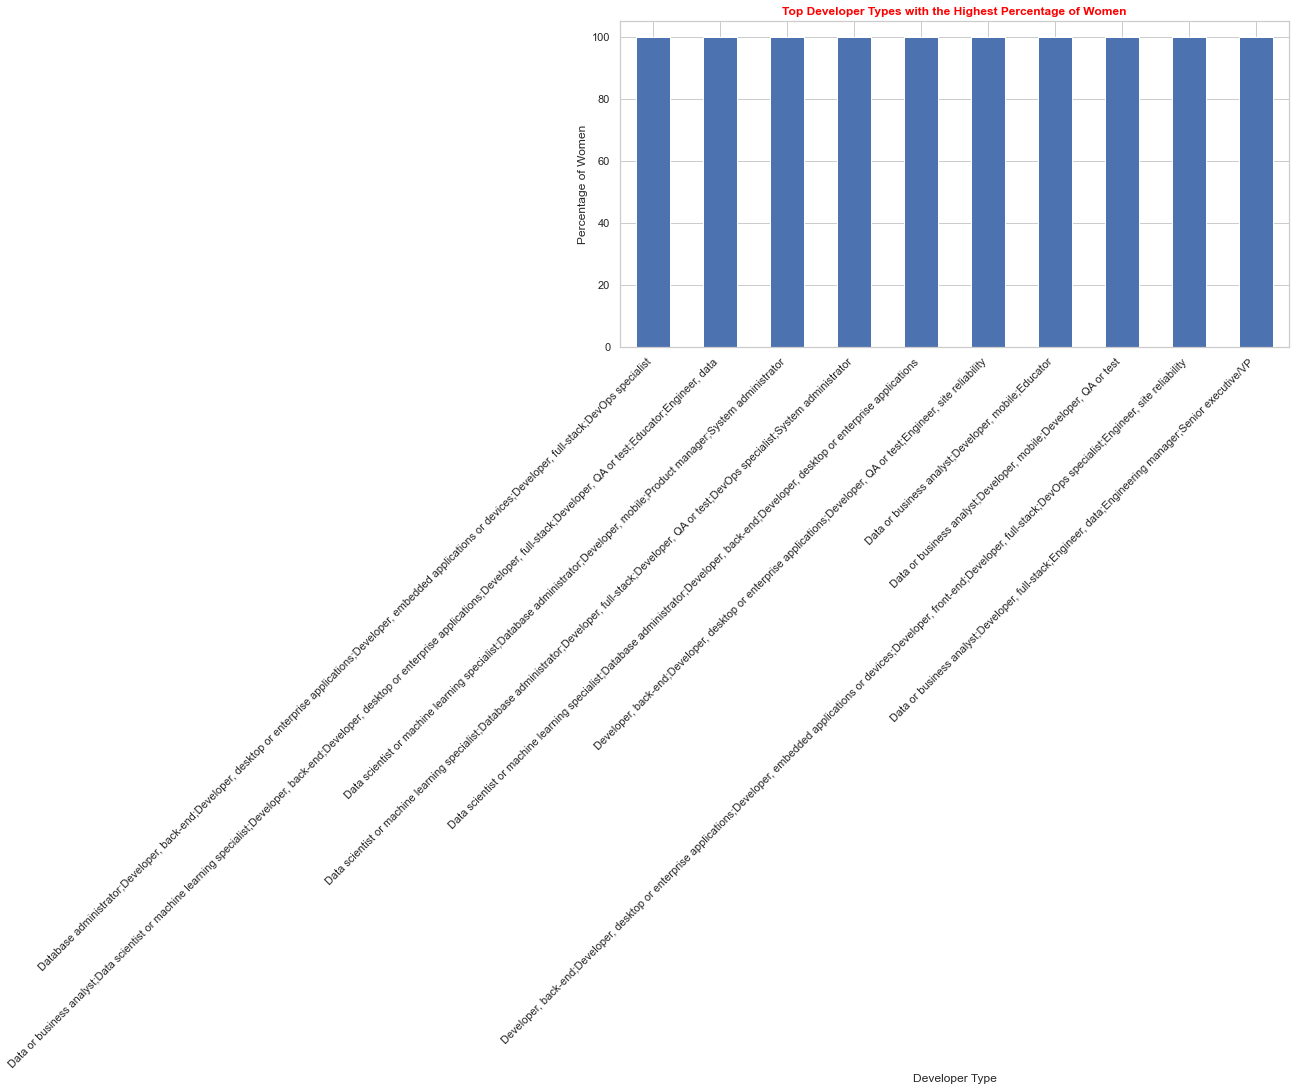

In [42]:
women_devs = surveyDF[surveyDF['Gender'] == 'Woman']


percentage_women_by_devtype = (women_devs['DevType'].value_counts() / surveyDF['DevType'].value_counts()) * 100


percentage_women_by_devtype = percentage_women_by_devtype.sort_values(ascending=False)


top_n = 10  # You can change this value as needed
percentage_women_by_devtype = percentage_women_by_devtype.head(top_n)


plt.figure(figsize=(12, 6))
percentage_women_by_devtype.plot(kind='bar')
plt.title('Top Developer Types with the Highest Percentage of Women',color="red", fontweight="bold")
plt.xlabel('Developer Type')
plt.ylabel('Percentage of Women')
plt.xticks(rotation=45, ha='right')  

plt.show()


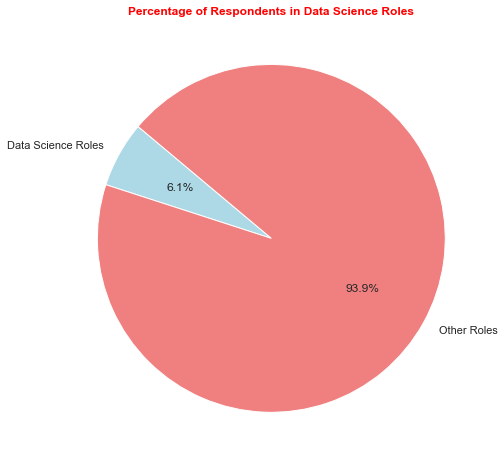

In [43]:
data_science_titles = [
    "Data scientist",
    "Data analyst",
    "Machine learning engineer",
    "Business intelligence or data warehousing expert"
    "Data or business analyst",]

# Filter the DataFrame based on the job titles
data_science_df = surveyDF[surveyDF['DevType'].str.contains('|'.join(data_science_titles), case=False, na=False)]

# Calculate the percentage of respondents in data science roles
percentage_data_scientists = (len(data_science_df) / len(surveyDF)) * 100

# Define the labels for the pie chart
labels = ['Data Science Roles', 'Other Roles']

# Calculate the percentage of respondents in data science roles and other roles
percentage_data_scientists = (len(data_science_df) / len(surveyDF)) * 100
percentage_other_roles = 100 - percentage_data_scientists


sizes = [percentage_data_scientists, percentage_other_roles]
colors = ['lightblue', 'lightcoral']
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Respondents in Data Science Roles',color="red", fontweight="bold")
plt.show()



## <span style="color: purple;">Q1) What are the most popular languages? </span>

In [44]:
surveyDF.LanguageWorkedWith


0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64258, dtype: object

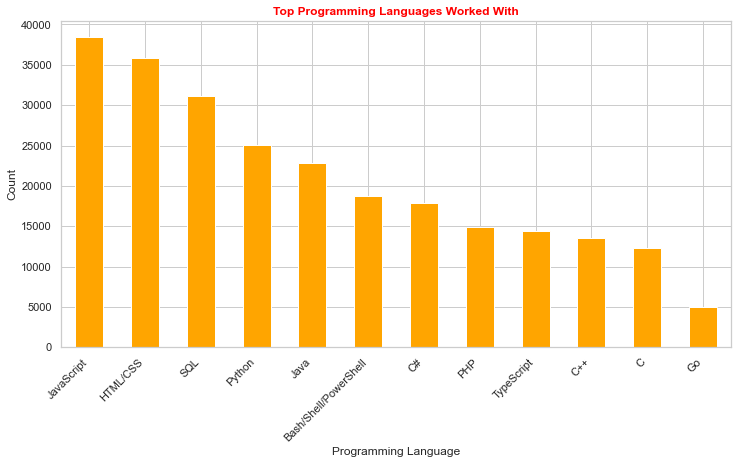

In [45]:
# Split the entries in the 'LanguageWorkedWith' column into a list of languages
languages_list = surveyDF['LanguageWorkedWith'].str.split(';', expand=True)

# Stack the resulting DataFrame to create a single column of languages
languages = languages_list.stack()
language_counts = languages.value_counts()
top_n = 12  
language_counts = language_counts.head(top_n)

# Create a bar plot to visualize the most popular languages
plt.figure(figsize=(12, 6))
language_counts.plot(kind='bar',color="orange")
plt.title('Top Programming Languages Worked With',color="red", fontweight="bold")
plt.xlabel('Programming Language')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') 

plt.show()

<span style="color: green;">The survey data shows that some programming languages are more popular among developers. For example, JavaScript, often used with HTML and CSS for web development, is a top choice due to the high demand for web skills and its beginner-friendly nature. SQL, important for working with databases, is also widely used. Python is a favorite for various development tasks and is even more popular than Java, which was widely used in the industry for a long time. This suggests that these languages have their own roles in different areas of software development.</span>

## <span style="color: purple;">Q2) What are the most common languages used by developers older than 40 years of age? </span>

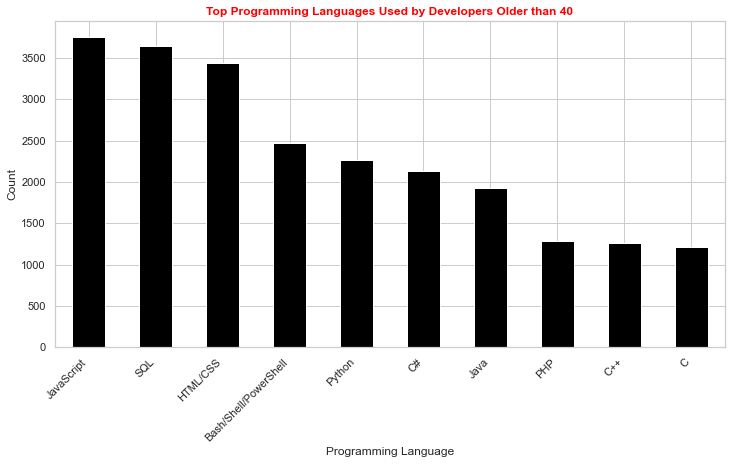

In [46]:
older_than_40 = surveyDF[surveyDF['Age'] > 40]

# Split the entries in the 'LanguageWorkedWith' column into a list of languages
languages_list = older_than_40['LanguageWorkedWith'].str.split(';', expand=True)

# Stack the resulting DataFrame to create a single column of languages
languages = languages_list.stack()

# Count the occurrences of each language
language_counts = languages.value_counts()
top_n = 10  
language_counts = language_counts.head(top_n)


plt.figure(figsize=(12, 6))
language_counts.plot(kind='bar', color = "black")
plt.title('Top Programming Languages Used by Developers Older than 40',color="red", fontweight="bold")
plt.xlabel('Programming Language')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  

plt.show()


<span style="color: green;">We can see that people are older than 40 years old mostly use JavaScript and SQL.They might be working with databases or they don't think to learn about more Python and Java.</span>

## <span style="color: purple;">Q3) What are the most common languages used by developers in Canada? </span>


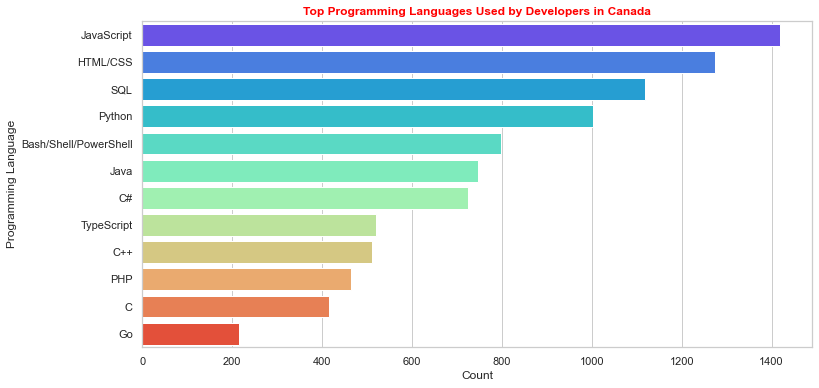

In [47]:
# Filter the DataFrame to only include rows where the 'Country' is 'Canada'
canadian_devs = surveyDF[surveyDF['Country'] == 'Canada']

# Split the entries in the 'LanguageWorkedWith' column into a list of languages
languages_list = canadian_devs['LanguageWorkedWith'].str.split(';', expand=True)

# Stack the resulting DataFrame to create a single column of languages
languages = languages_list.stack()

# Count the occurrences of each language
language_counts = languages.value_counts()
top_n = 12  
language_counts = language_counts.head(top_n)

# Create a bar plot using Seaborn to visualize the most common languages used by developers in Canada
plt.figure(figsize=(12, 6))
sns.barplot(x=language_counts.values, y=language_counts.index, palette='rainbow')
plt.title('Top Programming Languages Used by Developers in Canada',color="red", fontweight="bold")
plt.xlabel('Count')
plt.ylabel('Programming Language')

plt.show()


<span style="color: green;">In Canada, the most commonly used programming languages among developers are JavaScript, HTML/CSS, SQL, and Python. JavaScript is a popular choice for web development, HTML/CSS is crucial for building web pages, SQL is needed for database management, and Python is versatile for various tasks. These languages play key roles in Canadian software development, reflecting the country's focus on web technologies, data management, and a diverse software landscape.</span>

## <span style="color: purple;">Q4) Which languages are the most people interested to learn over the next year? </span>

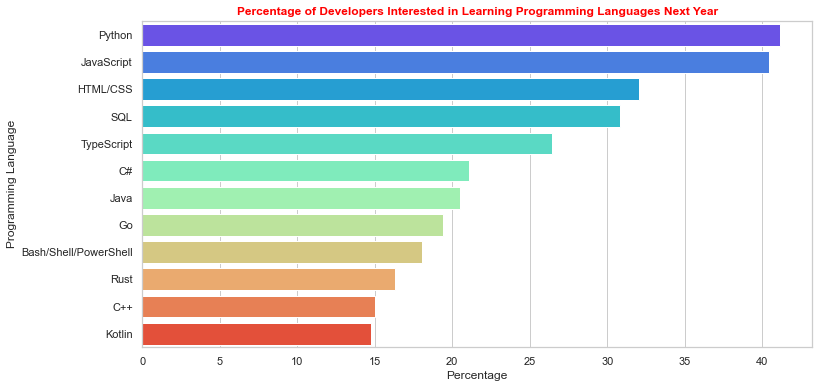

In [48]:
# Split the entries in the 'LanguageDesireNextYear' column into a list of languages
languages_list = surveyDF['LanguageDesireNextYear'].str.split(';', expand=True)
# Stack the resulting DataFrame to create a single column of desired languages
desired_languages = languages_list.stack()
# Calculate the percentage of developers interested in each language
language_desire_percentage = (desired_languages.value_counts() / len(surveyDF)) * 100
top_n = 12  
language_desire_percentage = language_desire_percentage.head(top_n)


plt.figure(figsize=(12, 6))
sns.barplot(x=language_desire_percentage.values, y=language_desire_percentage.index, palette='rainbow')
plt.title('Percentage of Developers Interested in Learning Programming Languages Next Year',color="red", fontweight="bold")
plt.xlabel('Percentage')
plt.ylabel('Programming Language')

plt.show()


<span style="color: green;">Looking ahead to the next year, it's clear that many people want to learn specific programming languages. Python is at the top, likely because it's used in a wide range of jobs, from websites to data work. JavaScript is a close second because it's vital for web development, while HTML/CSS are the basics of web design. SQL is important for managing data, and TypeScript is gaining interest for making web projects more stable and reliable. These choices show a desire to gain skills that are practical, in-demand, and open doors to different job opportunities in the world of programming.</span>

## <span style="color: purple;">Q5) In which countries do developers work the highest number of hours per week? Consider countries with more than 200 responses only.</span>


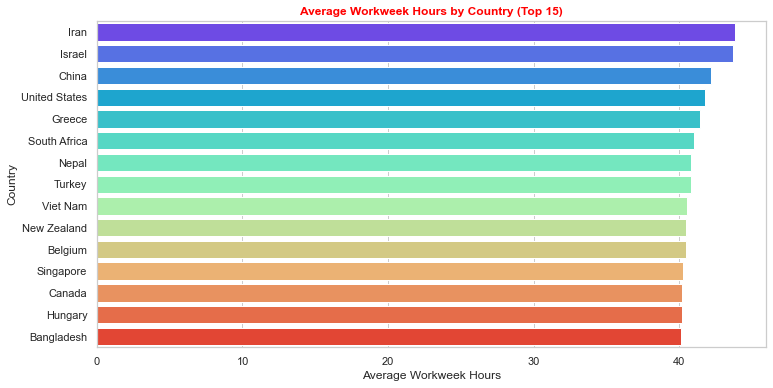

In [49]:
countriesDF = surveyDF.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending=False)
HighRcountriesDF = countriesDF.loc[surveyDF.Country.value_counts() > 200].head(15)
plt.figure(figsize=(12, 6))
sns.barplot(data=HighRcountriesDF, x='WorkWeekHrs', y=HighRcountriesDF.index, palette='rainbow')
plt.title('Average Workweek Hours by Country (Top 15)',color="red", fontweight="bold")
plt.xlabel('Average Workweek Hours')
plt.ylabel('Country')

plt.show()

<span style="color: green;">Iran, Israel and China have the highest working hours, followed by the United States. However, there isn't difference between work hours and the average working hours seem to be around 40 hours per week.</span>

## <span style="color: purple;">Q6) How important is it to begin early in order to build a career in programming?</span>


In [50]:
Schema.YearsCodePro



'NOT including education, how many years have you coded professionally (as a part of your work)?'

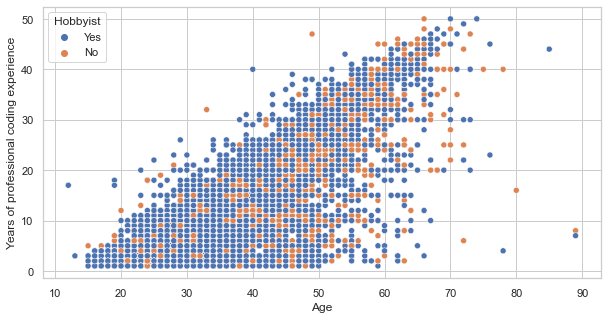

In [51]:
sns.scatterplot(x='Age', y='YearsCodePro', hue='Hobbyist', data=surveyDF)
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");

<span style="color: green;">You can see points all over the graph, which indicates that you can start programming professionally at any age. Many people who have been coding for several decades professionally also seem to enjoy it as a hobby.</span>

## <span style="color: purple;">Q7) What are the most common countries of residence among the survey respondents between 18-30(early career)?</span>


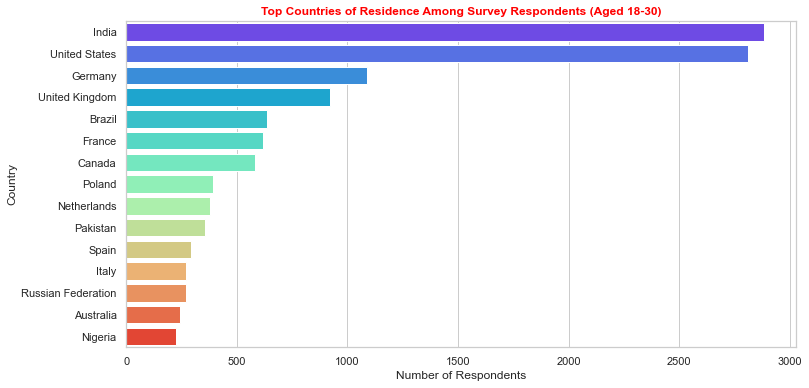

In [52]:
filtered_surveyDF = surveyDF[(surveyDF['Age'] >= 18) & (surveyDF['Age'] <= 27)]
country_counts = filtered_surveyDF['Country'].value_counts().head(15)


plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='rainbow')
plt.title('Top Countries of Residence Among Survey Respondents (Aged 18-30)', color="red", fontweight="bold")
plt.xlabel('Number of Respondents')
plt.ylabel('Country')

plt.show()

<span style="color: green;">
The survey data shows the most common countries of residence among early-career developers aged 18 to 30. India leads the list with the highest number of survey respondents in this age group, followed by the United States, Germany, the United Kingdom, Brazil, France, and Canada. This information highlights the significant representation of young developers in India and the United States, demonstrating the global nature of the software development community. It also indicates that countries in Europe, South America, and North America are well-represented in the early-career developer demographic.</span>

## <span style="color: purple;">Q8) How satisfied are developers with their jobs?</span>


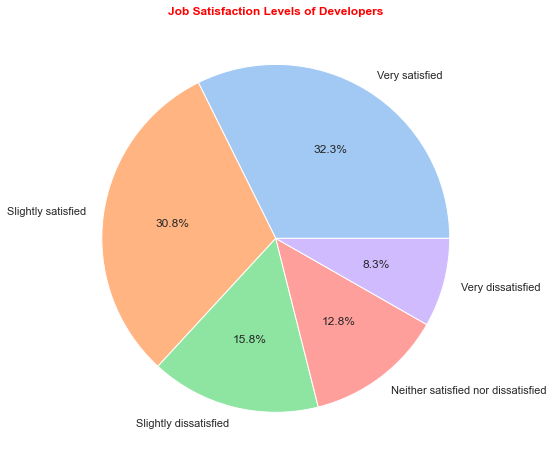

In [53]:
job_satisfaction_counts = surveyDF['JobSat'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(job_satisfaction_counts, labels=job_satisfaction_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Job Satisfaction Levels of Developers',color="red", fontweight="bold")
plt.show()

<span style="color: green;">Most developers express satisfaction with their jobs, with "Very Satisfied" and "Slightly Satisfied" being the predominant responses, while a smaller minority holds stronger feelings of dissatisfaction.</span>

## <span style="color: purple;">Q9) What are the most commonly used database technologies among developers, and is there a relationship between the choice of a database and the developer's years of coding experience?</span>


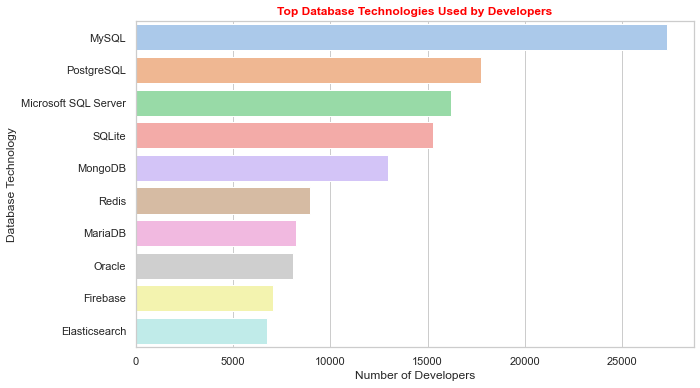

In [54]:
# Split the 'DatabaseWorkedWith' column and count the usage of each database
database_technologies = surveyDF['DatabaseWorkedWith'].str.split(';', expand=True).stack().str.strip()
database_counts = database_technologies.value_counts()

# Visualization for the most commonly used database technologies
top_databases = database_counts.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_databases.values, y=top_databases.index, palette='pastel')
plt.title('Top Database Technologies Used by Developers',color="red", fontweight="bold")
plt.xlabel('Number of Developers')
plt.ylabel('Database Technology')

plt.show()

In [55]:
## We use this determine if there is a statistically significant association or independence between two categorical variables.
from scipy.stats import chi2_contingency
# Create a contingency table
contingency_table = pd.crosstab(surveyDF['DatabaseWorkedWith'], surveyDF['YearsCode'])

# Perform the Chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

# Interpret the results based on the p-value
if p < 0.05:
    print("There is a significant relationship between database choice and experience.")
else:
    print("There is no significant relationship between database choice and experience.")


Chi-squared value: 151173.4434396168
P-value: 6.357320996342908e-280
There is a significant relationship between database choice and experience.


* The results of the Chi-squared test indicate a highly significant relationship between the choice of a database and the developer's experience (measured by the "YearsCode" column).

* Chi-squared Value: The large Chi-squared value (151,173.44) suggests that there is substantial variation in the data. It's a measure of the discrepancy between the observed and expected values in the contingency table.

* P-Value: The extremely small p-value (approximately 6.36e-280) indicates that this relationship is highly unlikely to have occurred by chance. In statistical terms, it means the relationship is significant.

* Interpretation: In practical terms, a significant relationship implies that the choice of a database technology is associated with the developer's experience level. This means that developers with different levels of experience are more likely to choose different database technologies. The p-value is so small that it strongly supports the idea that this relationship is not random.

## <span style="color: purple;">Q10 What are the differences in the average weekly working hours among developers from various ethnic backgrounds, specifically focusing on White, Latino/Hispanic, East Asian, South Asian, Middle Eastern and Black individuals) </span>

In [56]:
# Display unique values in the 'Ethnicity' column
unique_ethnicities = surveyDF['Ethnicity'].unique()

# Print the unique values
for ethnicity in unique_ethnicities:
    print(ethnicity)

White or of European descent
nan
Hispanic or Latino/a/x
East Asian
Black or of African descent
Middle Eastern
White or of European descent;Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)
South Asian
Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)
Hispanic or Latino/a/x;White or of European descent
Multiracial
East Asian;White or of European descent
Biracial
Hispanic or Latino/a/x;Middle Eastern;White or of European descent
Southeast Asian
East Asian;White or of European descent;Biracial
Hispanic or Latino/a/x;White or of European descent;Biracial
White or of European descent;Biracial
Hispanic or Latino/a/x;White or of European descent;Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)
Black or of African descent;Hispanic or Latino/a/x;White or of European descent;Multiracial
White or of European descent;Southeast Asian
Black or of African descent;East Asian;Hispanic or Latino/a/x;Middle East

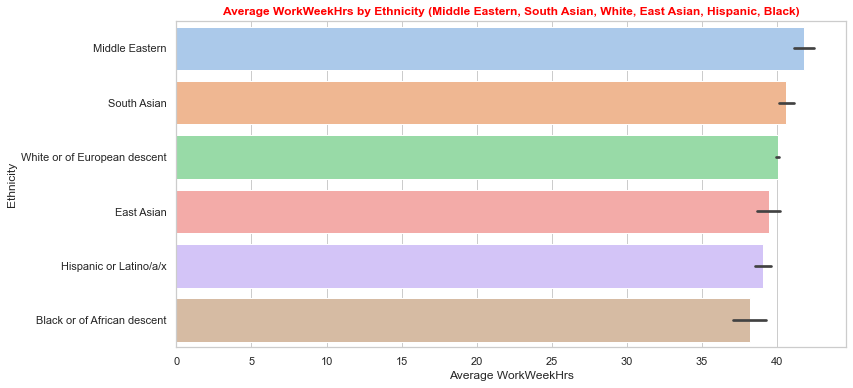

In [57]:
selected_ethnicities = [
    'Middle Eastern',
    'South Asian',
    'White or of European descent',
    'East Asian',
    'Hispanic or Latino/a/x',
    'Black or of African descent'
]

# Filter the DataFrame to include only the selected ethnicities
filtered_df = surveyDF[surveyDF['Ethnicity'].isin(selected_ethnicities)]

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a barplot to visualize the average working hours for each ethnicity
sns.barplot(x='WorkWeekHrs', y='Ethnicity', data=filtered_df, palette='pastel', order=selected_ethnicities)

# Set plot labels and title
plt.title('Average WorkWeekHrs by Ethnicity (Middle Eastern, South Asian, White, East Asian, Hispanic, Black)', color="red", fontweight="bold")
plt.xlabel('Average WorkWeekHrs')
plt.ylabel('Ethnicity')

# Show the plot
plt.show()

## This analysis explores the average working hours (WorkWeekHrs) for developers from different ethnic backgrounds. The survey data categorizes developers into six ethnic groups: 'Middle Eastern,' 'South Asian,' 'White,' 'East Asian,' 'Hispanic or Latino,' and 'Black.'

## The data indicates that 'Middle Eastern' and 'South Asian' developers tend to work the longest hours on average more than 40 hours, followed by 'White' developers. 'East Asian' and 'Hispanic or Latino' developers also have relatively high average working hours, while 'Black' developers, on average, work the fewest hours.

## It's important to note that this analysis is based on survey responses, and the results may not fully represent the true work patterns of developers from these ethnic backgrounds. Various factors, such as job roles, work environments, and personal preferences, can influence working hours. Therefore, the findings should be interpreted with caution, and individual experiences may vary.